---
# <div align="center"><font color='green'> EEET 2485 | Research Methods for Engineers  </font></div>
## <div align="center"> <font color='green'> **Assessment 3**</font></div>
---

# Introduction

## Dataset
This dataset provides a comprehensive collection of 100 elemental properties for 85 distinct elements, including a wide range of both physical and chemical characteristics. The concept of atomic properties includes essential characteristics such as atomic weight, atomic number, electron configuration, and categorization into groups and periods. Furthermore, the collection offers detailed information on the chemical and physical characteristics of elements, including valence electrons, ionization energy, and electronegativity. The mechanical characteristics are comprehensively represented, including several measurements of hardness (such as Vickers and Brinell), as well as the Young modulus and shear modulus. Significantly, several columns have missing data, with the most substantial gaps detected in parameters such as Vickers hardness and Putz Russo Sicillia electronegativity. This collection is a great resource for education, materials science research, and businesses where knowledge of elemental characteristics is essential.

## List of Questions
- How do atomic size and electronegativity correlate with melting points across different groups of elements?

# Load dataset 
Lets first load the dataset

In [33]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

In [34]:
df = pd.read_excel("oliynyk-elemental-property-list.xlsx")
print(df)

   Symbol Electron \nconfiguration  Atomic \nweight  Atomic \nnumber  Period  \
0       H                      1s1         1.007940                1       1   
1      He                      1s2         4.002602                2       1   
2      Li                  [He]2s1         6.941000                3       2   
3      Be                  [He]2s2         9.012180                4       2   
4       B               [He]2s22p1        10.811000                5       2   
..    ...                      ...              ...              ...     ...   
80     Tl       [Xe]6s24f145d106p1       204.383300               81       6   
81     Pb       [Xe]6s24f145d106p2       207.200000               82       6   
82     Bi       [Xe]6s24f145d106p3       208.980370               83       6   
83     Th               [Rn]7s26d2       232.038100               90       7   
84      U            [Rn]7s25f36d1       238.028900               92       7   

    Group  quantum \nnumber l  Metal(1)

# Data Preparation
First, ensure that each row is unique and corresponds to a distinct chemical element by checking for and removing any duplicate rows.

In [35]:
duplicate = df.duplicated().sum()

if duplicate > 0:
    df = df.drop_duplicates()
    print("Duplicates removed. New dataframe length:", len(df))
else:
    print("No duplicates found.")

No duplicates found.


Then, compute and show the quantity of missing data for every column. Only columns containing null values will be shown. This helps in determining whether columns need further processing or data imputation.

In [36]:
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]  # Filter out columns with no missing values
print(missing_values)

Pauling valence, \nv                7
Pearson\nabsolute (eV)             21
Ghosh\nGupta (eV)                  31
Pauling \nEN                        3
Martynov \nBatsanov EN              5
Mulliken\nEN                        5
Allred\nEN                          5
Putz\nRusso\nSicillia\nEN          33
Gordy\nEN                          28
Pauling, \nR(CN12)                 13
Pauling, \nR(1)                     8
Thermal expansion, \nK^-1          17
Cohesive \nenergy                   2
Bulk modulus,\nGPa                  5
Sheer modulus,\nGPa                24
Young modulus,\nGPa                22
Hardness Vickers,\nGPa             41
Hardness Brinell,\nGPa             21
Resistivity (mΩ)                   10
Electrical Conductivity \n(S/m)    10
Neutron \nMass \nAbsorption         3
Abundance in Earth's \ncrust        2
HHI production                      9
HHI reserve                         9
cost, \npure\n($/100g)              2
dtype: int64


- In order to maintain the accuracy and strength of the analysis, we will use mean imputation to handle any missing values in the dataset. This approach is especially efficient for datasets in which the missing values are considered to be missing entirely at random (MCAR) and the data distribution closely approximates normal.

- Mean imputation is a straightforward approach of dealing with missing data. The process entails substituting all absent (NaN) values in a column with the average value of that column. This strategy is especially beneficial when the data follows a normal distribution, since the mean accurately represents the central tendency.

- Effectively handling missing values requires the ability to recognize and differentiate between numeric and non-numeric data types. This distinction is crucial since mean imputation can only be applied on numerical data. Imputing non-numeric data types, such as categorical or ordinal data, requires distinct methods since their central tendency cannot be effectively represented by the mean.

In [37]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
imputer = SimpleImputer(strategy='mean')
df[numeric_cols] = imputer.fit_transform(df[numeric_cols])

print(df)

   Symbol Electron \nconfiguration  Atomic \nweight  Atomic \nnumber  Period  \
0       H                      1s1         1.007940              1.0     1.0   
1      He                      1s2         4.002602              2.0     1.0   
2      Li                  [He]2s1         6.941000              3.0     2.0   
3      Be                  [He]2s2         9.012180              4.0     2.0   
4       B               [He]2s22p1        10.811000              5.0     2.0   
..    ...                      ...              ...              ...     ...   
80     Tl       [Xe]6s24f145d106p1       204.383300             81.0     6.0   
81     Pb       [Xe]6s24f145d106p2       207.200000             82.0     6.0   
82     Bi       [Xe]6s24f145d106p3       208.980370             83.0     6.0   
83     Th               [Rn]7s26d2       232.038100             90.0     7.0   
84      U            [Rn]7s25f36d1       238.028900             92.0     7.0   

    Group  quantum \nnumber l  Metal(1)

# Question 1: ``How do atomic size and electronegativity correlate with melting points across different groups of elements``?

## Data Distribution
Analysing data distribution in 4 collumns: Atomic radius calculated' 'Pauling EN', 'Melting point K', 'Group' to understand the overall structure and behavior of the data.

In [48]:
columns_of_interest = ['Atomic\nradius calculated', 'Pauling \nEN', 'Melting point,\nK', 'Group']
df1 = df[columns_of_interest]
df1['Group'] = df1['Group'].astype(int)

### Histograms
- ``Atomic Radius Calculated:``
    + Observation: The histogram indicates that the majority of elements possess an atomic radius ranging from 0.5 to 2.5. Additionally, there is a significant cluster of elements with atomic radii centered around 1.0 to 1.5.
    + Interpretation: This distribution indicates that a considerable proportion of the elements possess atomic radii that are somewhat modest, whereas fewer elements have atomic radii that are either extremely big or very tiny. Heavy and light elements are less prevalent compared to elements with intermediate atomic weights and sizes, which is a frequent occurrence.

- ``Pauling Electronegativity:``
    + Observation: The histogram representing Pauling Electronegativity displays a distribution that is mostly concentrated between the values of 1.0 and  2.75, with the highest frequency occurring around the range of 1.5 to 2.0.
    + Interpretation: The distribution of elements shows that a significant number of them possess a moderate level of electronegativity, whereas there are fewer elements that have a greater level of electronegativity. Non-metals and halogens, which are less abundant than metals, are often associated with high electronegativity.

- ``Melting Point (K):``
    + Observation: The histogram exhibits a broad spectrum of melting temperatures, ranging from near-zero values up to 3500 K. There are two prominent peaks in the temperature distribution, one at around 500 K and a lesser peak at nearly 3000 K.
    + Interpretation:  The wide spectrum indicates a varied collection of physical characteristics among the elements, which indicates variations in chemical bonding and structure. Elements with very high melting points are often metals characterized by strong metallic bonding or covalently bound substances such as carbon, specifically in the form of diamond.

- ``Group:``
    + Observation: The histogram representing the variable 'Group' has a bimodal distribution, characterized by two distinct peaks. The first peak is seen in the lower groups, namely groups 1 to 4, while the second peak is observed in groups 14 to 16.
    + Interpretation: This distribution illustrates the prevalence of certain elements in different groups. The lower groups are mostly composed of alkali and alkaline earth metals, while the upper groups consist of carbon, nitrogen, and oxygen group elements, which are more abundant and diverse in nature.

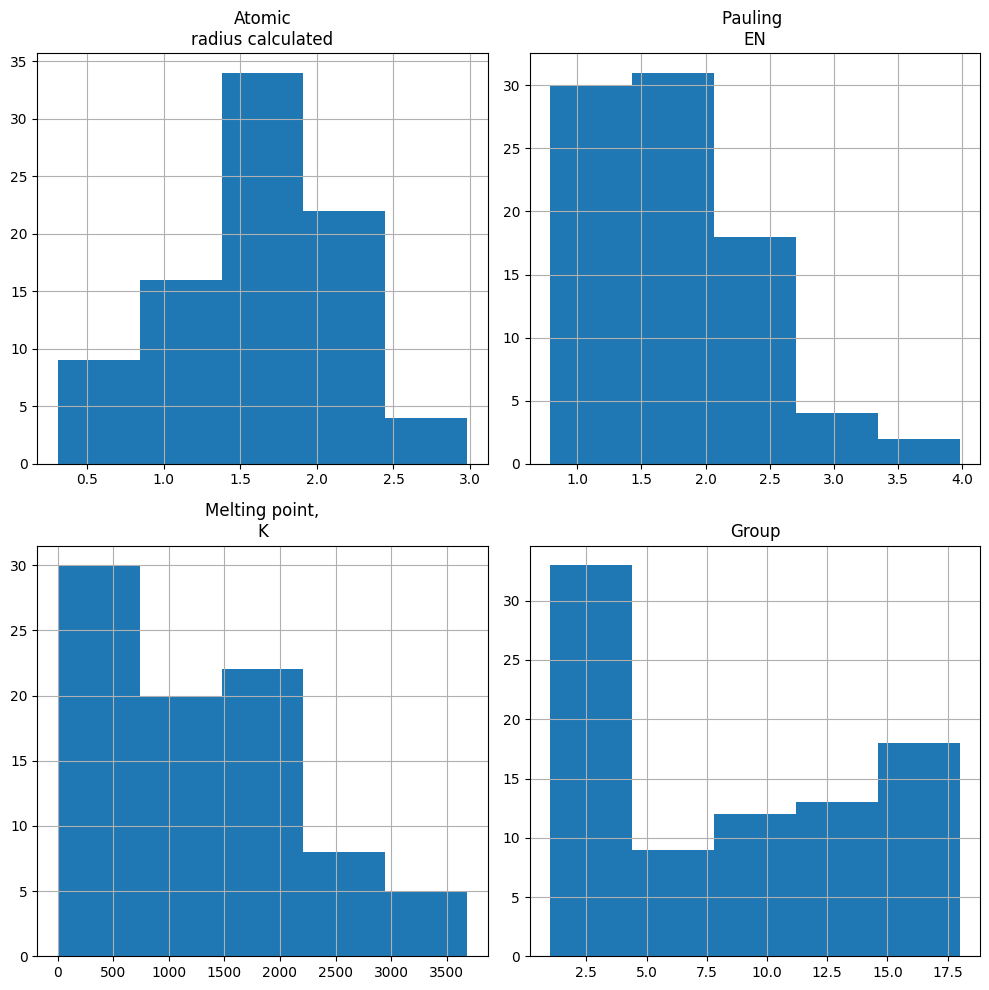

In [50]:
df1.hist(bins=5, figsize=(10,10))
plt.tight_layout()  
plt.show()

## Box Diagram

- ``Atomic Radius Calculated:``
    + Median: Around 1.5.
    + IQR: The box spans from around 1.0 to 2.0, suggesting that the interquartile range of atomic radii falls within this interval.
    + Outliers: There are no outliers present in the data, and the values are closely clustered around the median, indicating a stable range for the majority of items.

- ``Pauling Electronegativity:``
    + Median: Slightly above 1.5.
    + IQR: Ranges between about 1.25 and slightly over 2.0. This indicates that exactly 50% of the elements possess electronegativities within this specific range.
    + Outliers: There is a single outlier over 3.5, which may represent an element with very high electronegativity, most likely a non-metal.

- ``Melting Point (K):``
    + Median: around 1200 K.
    + IQR: Extends from around 300 K to approximately 1750 K. The large variety of melting points seen in various substances is a result of their diverse characteristics, ranging from very low melting points, as seen in mercury and gallium, to exceptionally high melting points, as observed in refractory metals.
    + Outliers: A single data point stands out about 2500 K, indicating the presence of an element with an exceptionally high melting point, maybe a refractory metal.

- ``Group:``
    + Median: Around 10.
    + IQR: From about 5 to 15, covering a spectrum of elements ranging from early transition metals to the pnictogens.
    + Outliers: No outliers are evident, suggesting that the data encompasses many groupings but does not reach the extreme ends of the periodic table.

> **<span style="font-size:1.5em;"></span> Interpretation and Conclusions:**
>- Atomic Radius: The majority of elements in the collection have a comparable size, indicating a possible scarcity of lanthanides or actinides, which are often characterized by greater atomic radii.

>- Electronegativity:The majority of elements exhibit a moderate level of electronegativity, with the exception of one element that has a very high value. This distribution indicates a comprehensive inclusion of both metallic and non-metallic elements.

>- Melting Point: The melting point data demonstrates the presence of both metals, which often have greater melting points, and non-metals or metalloids, which typically have lower melting points.

>- Group Distribution: The distribution of groups indicates a high concentration in the intermediate groups, indicating a mixture that may consist of transition metals, metalloids, and a few non-metals.

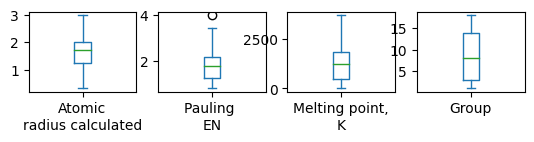

In [51]:
df1.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False)
plt.show()

## Relationship between collumns
Analysing data in 4 collumns: Atomic radius calculated' 'Pauling EN', 'Melting point K', 'Group' to find the relationship between them and answer the question.

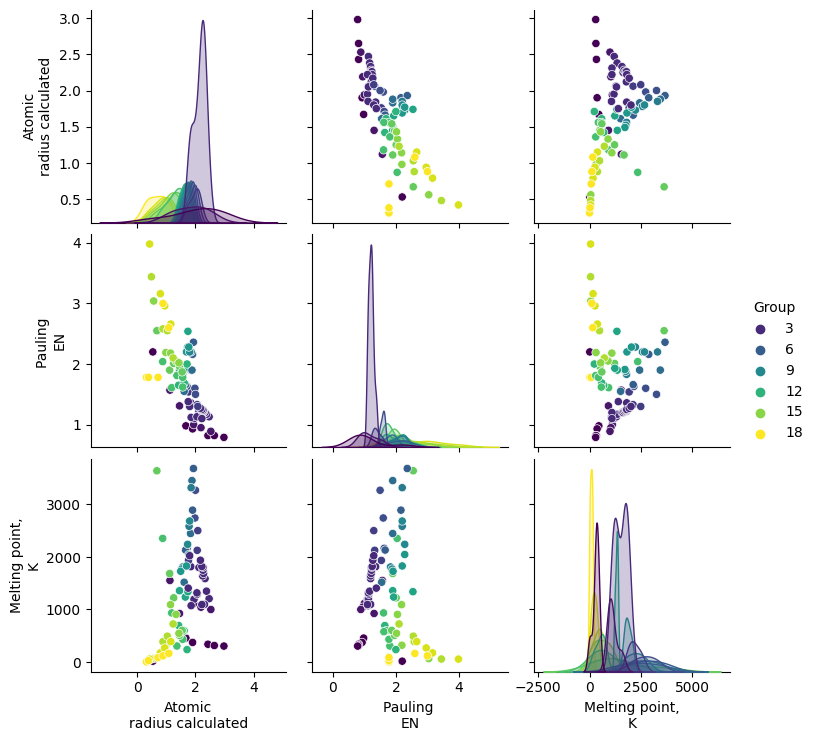

In [40]:
plt.rcdefaults()

df['Group'] = df['Group'].astype(int)
sns.pairplot(df, vars=['Atomic\nradius calculated', 'Pauling \nEN', 'Melting point,\nK'], hue='Group', palette='viridis')
plt.show()

## Heatmaps
Upon examining the group-specific heatmaps output, one can see the relationships among atomic size (atomic radius calculated), electronegativity (measured by Pauling EN), and melting points (expressed in Kelvin) for each group. Below is an in-depth study derived from these correlations:

``General Observations:``
- The relationship between atomic radius and melting point is often positive in many groups. This means that elements with bigger atomic sizes typically have higher melting temperatures within those groups. This phenomenon is particularly prominent in groupings that have historically been composed of metallic elements.
- The relationship between electronegativity and melting point is usually inverse throughout various groups, indicating that elements with greater electronegativity tend to exhibit lower melting temperatures within those groups. This pattern aligns with the observation that increased electronegativity is often linked to non-metallic properties.

``Specific Insights by Group:`` Groups exhibiting a robust positive correlation include atomic size and melting point.
- Group 1 (Alkali Metals): Strong negative correlation (-0.88) between atomic radius and melting point. This indicates that bigger alkali metals tend to have lower melting temperatures. There is a weak negative link with electronegativity, with a correlation coefficient of -0.62.
- Group 2 (Alkaline Earth Metals): Also exhibits a negative connection between atomic radius and melting point, with a correlation coefficient of -0.39. However, this association is not as significant as the one seen in Group 1.
- Transition Groups (3 to 12):  In general, there is a direct relationship between the size of the atoms and the temperature at which they melt. This connection is most pronounced in Groups 5, 6, and 10, with correlation coefficients near to or above +0.90. This implies that in the case of transition metals, there is a tendency for increased atomic size to be associated with higher melting points.
- Post-transition Metals (Groups 13 to 16): exhibit substantial variations. Group 13 has a robust positive correlation of 0.90, whilst Group 15 shows a negative correlation of -0.69. There is a wide range of electronegativity correlations among these categories.
- Groups 17 and 18: Group 17 (Halogens) and Group 18 (Noble Gases) often exhibit a significant inverse relationship between atomic radius and melting point. This phenomenon illustrates the correlation between the size of nonmetals and noble gases and their respective melting temperatures, wherein bigger elements in both groups tend to have lower melting points.

> **<span style="font-size:1.5em;"></span> Analytical Summary:**
>- The link between atomic size and melting point might vary greatly across various groupings. Among transition metals (Groups 3 to 12), there is often a positive correlation between a bigger atomic radius and a higher melting point. This pattern demonstrates the growing potency of metallic bonding as the atomic scale expands within these groupings. In Groups 5, 6, and 10, there are strong positive connections between the size of atoms and their melting points. Specifically, bigger atoms are associated with much higher melting points.

>- Conversely, nonmetals and some post-transition metals often have a negative association in this regard. Significantly, within Group 15 (Pnictogens), there is a clear relationship between bigger atomic sizes and lower melting temperatures, indicating that larger atoms have less intermolecular interactions. Similarly, Halogens (Group 17) and Noble Gases (Group 18) exhibit the same trend, where larger atomic size corresponds to lower melting temperatures. This is because of the specific way molecules interact within these groups.

>- The impact of electronegativity on melting points also varies, but it lacks a regular pattern across all groups, making it a less dependable indicator of melting point compared to atomic size. The variety observed emphasizes the intricate relationship between the electrical structure and physical characteristics across the periodic table.

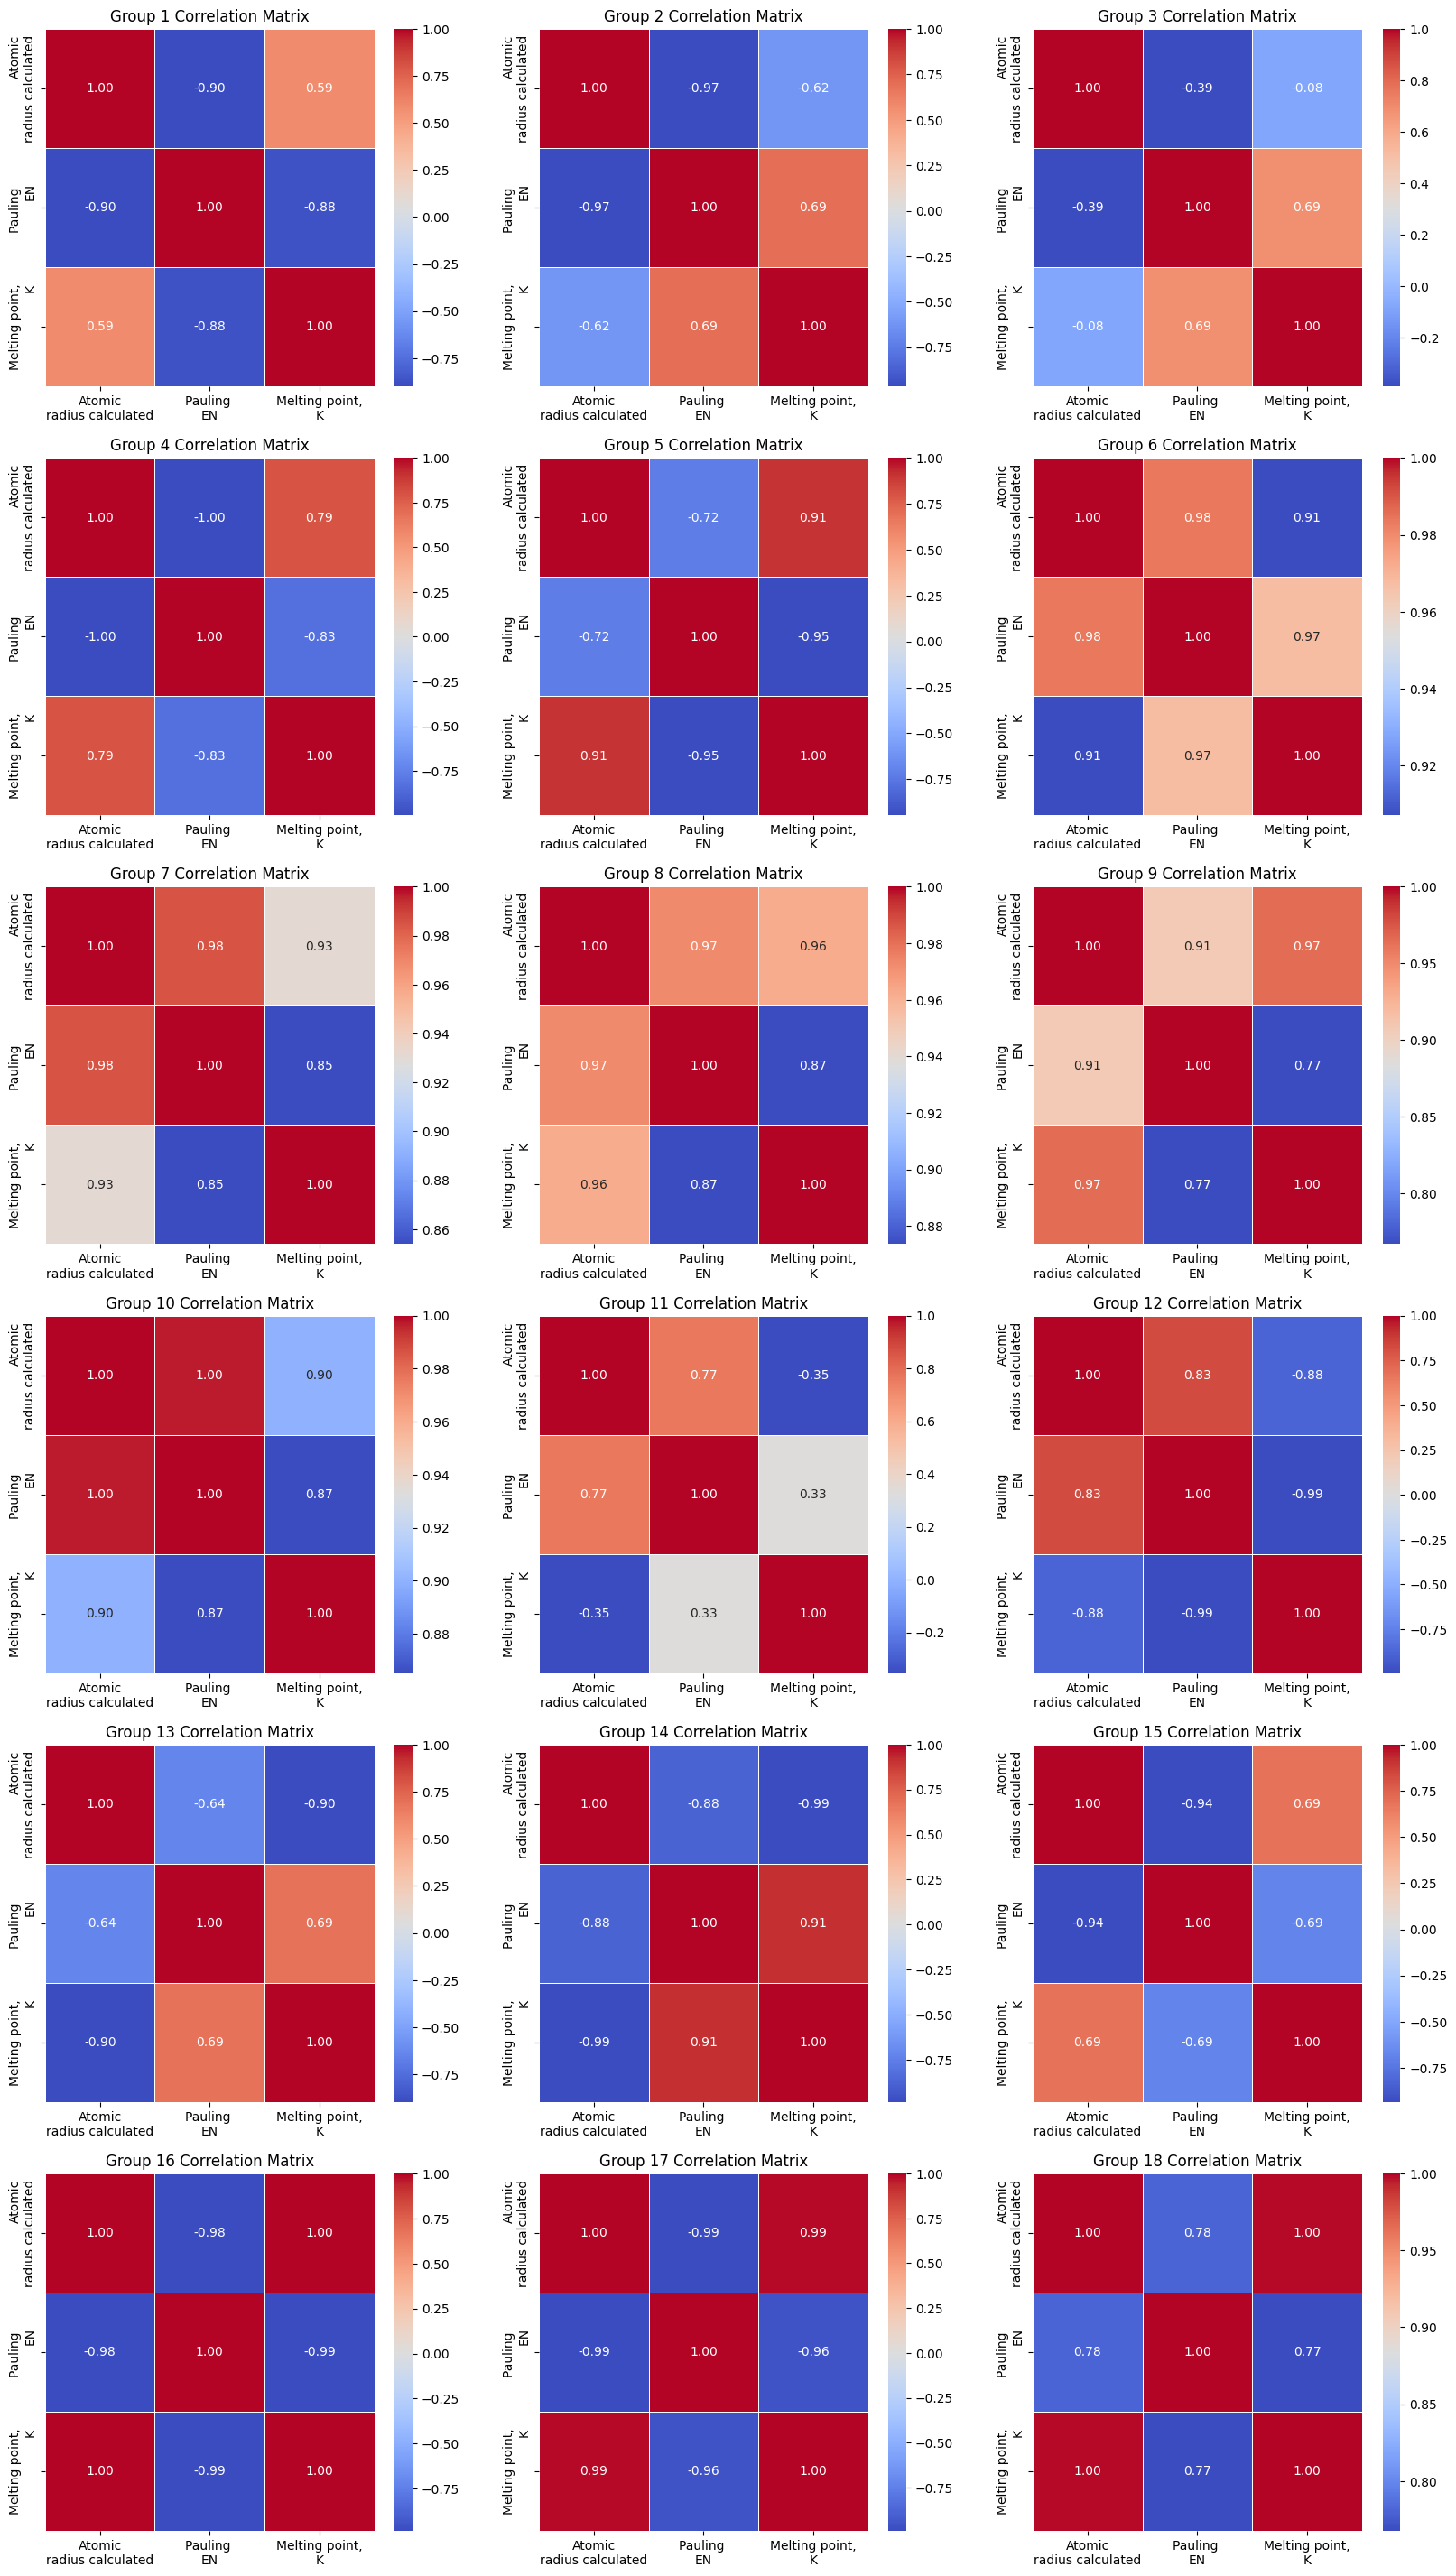

In [56]:


grouped = df.groupby('Group')

fig, axes = plt.subplots(nrows=int(grouped.ngroups/3), ncols=3, figsize=(20, 2 * grouped.ngroups))

axes = axes.flatten()

for (key, group), ax in zip(grouped, axes):
    corr_matrix = group[['Atomic\nradius calculated', 'Pauling \nEN', 'Melting point,\nK']].corr()
    
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, ax=ax)
    ax.set_title(f'Group {key} Correlation Matrix')

plt.show()

## Conclusion
The correlation between atomic size, electronegativity, and melting points varies across various groups, although some consistent patterns may be observed:
- Typically, metallic groups have a positive relationship between larger atomic size and higher melting temperatures.
- There is often a negative relationship between electronegativity and melting points, particularly in non-metallic groups.